In [137]:
from datetime import datetime, timedelta
from dateutil.parser import parse
from phe import data_for_date,  plot_diff
from constants import *
from matplotlib.pyplot import gca, legend, figure

In [58]:
def filtered_data_for_date(release_dt, earliest_dt, area_types, areas=None):
    return data_for_date(release_dt, areas, area_types)[earliest_dt:]

In [397]:
d2 = datetime(2020, 10,2).date()
delta = 1
d1 = d2 - timedelta(days=delta)
trim = '2020-09-01'
area_types = region
areas = None
new_data = filtered_data_for_date(d2, trim, area_types, areas)
old_data = filtered_data_for_date(d1, trim, area_types, areas)

<Figure size 720x288 with 0 Axes>

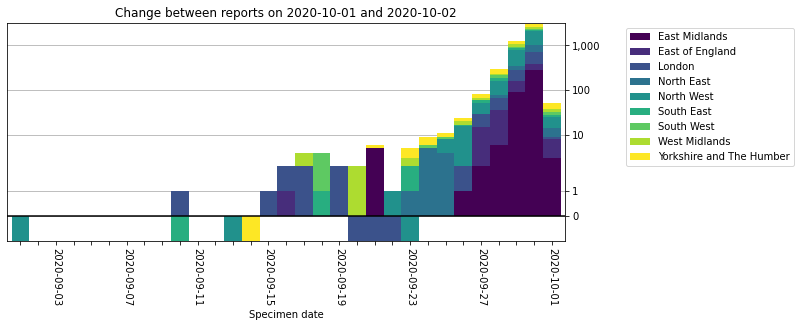

In [398]:
figure(figsize=(10, 4), facecolor='white')
figure(figsize=(10, 4), facecolor='white')
plot_diff(gca(), d2, new_data, d1, old_data, diff_ylims=None, diff_log_scale=True)
_ = legend(bbox_to_anchor=(1.1, 1))

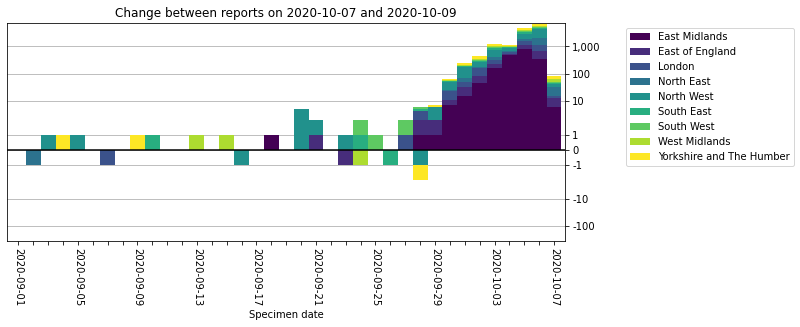

In [386]:
figure(figsize=(10, 4), facecolor='white')
figure(figsize=(10, 4), facecolor='white')
plot_diff(gca(), d2, new_data, d1, old_data, diff_ylims=None, diff_log_scale=True)
_ = legend(bbox_to_anchor=(1.1, 1))

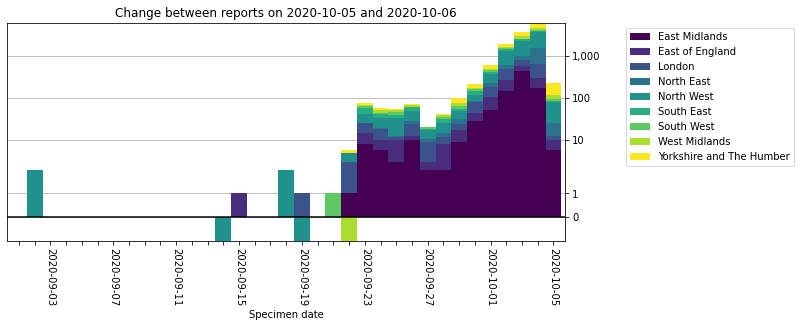

In [379]:
figure(figsize=(10, 4), facecolor='white')
plot_diff(gca(), d2, new_data, d1, old_data, diff_ylims=None, diff_log_scale=True)
_ = legend(bbox_to_anchor=(1.1, 1))

In [295]:
diff = new_data.sub(old_data, fill_value=0)
diff['Total'] = diff.sum(axis=1)
i = diff.where(diff['Total']<-100).dropna()
i

Area name,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber,Total
Specimen date,,,,,,,,,,
2020-11-17,-10.0,-21.0,-45.0,-1.0,-1.0,-32.0,-11.0,-12.0,0.0,-133.0
2020-11-18,-64.0,-56.0,-130.0,0.0,-3.0,-104.0,-35.0,-76.0,0.0,-468.0
2020-11-19,-9.0,-21.0,-65.0,1.0,-1.0,-45.0,-11.0,-15.0,0.0,-166.0
2020-11-20,-12.0,-24.0,-30.0,0.0,2.0,-35.0,-10.0,-24.0,4.0,-129.0
2020-11-21,-12.0,-16.0,-26.0,2.0,3.0,-23.0,-2.0,-37.0,8.0,-103.0
2020-11-22,-19.0,-17.0,-37.0,2.0,7.0,-27.0,1.0,-40.0,15.0,-115.0


In [296]:
i['Total'].sum()

-1114.0

In [297]:
i[i.columns[(i<-10).any()]]

Area name,East Midlands,East of England,London,South East,South West,West Midlands,Total
Specimen date,,,,,,,
2020-11-17,-10.0,-21.0,-45.0,-32.0,-11.0,-12.0,-133.0
2020-11-18,-64.0,-56.0,-130.0,-104.0,-35.0,-76.0,-468.0
2020-11-19,-9.0,-21.0,-65.0,-45.0,-11.0,-15.0,-166.0
2020-11-20,-12.0,-24.0,-30.0,-35.0,-10.0,-24.0,-129.0
2020-11-21,-12.0,-16.0,-26.0,-23.0,-2.0,-37.0,-103.0
2020-11-22,-19.0,-17.0,-37.0,-27.0,1.0,-40.0,-115.0


In [362]:
area_types=ltla_types
areas=None
new_data = filtered_data_for_date(d2, trim, area_types, areas)
old_data = filtered_data_for_date(d1, trim, area_types, areas)
diff = new_data.sub(old_data, fill_value=0)
a = diff[diff.sum(axis=1)< -100].transpose(copy=True)
i = a.loc[~((a >=0).all(axis=1))].copy()
total = i['Total'] = i.sum(axis=1)
result = i[total<-3].sort_values('Total')[:10]
result

Specimen date,2020-11-17,2020-11-18,2020-11-19,2020-11-20,2020-11-21,2020-11-22,Total
Area name,,,,,,,
Birmingham,-2.0,-11.0,-4.0,-3.0,-11.0,-8.0,-39.0
Bromley,-3.0,-12.0,-5.0,-2.0,0.0,-2.0,-24.0
Barnet,-2.0,-9.0,-8.0,-3.0,-1.0,0.0,-23.0
Lambeth,-1.0,-13.0,-3.0,-1.0,-1.0,-1.0,-20.0
Hillingdon,0.0,-4.0,-3.0,-4.0,-3.0,-4.0,-18.0
Leicester,-5.0,-4.0,-2.0,-1.0,-3.0,-2.0,-17.0
Richmond upon Thames,-1.0,-7.0,-2.0,-1.0,-2.0,-3.0,-16.0
Coventry,0.0,-7.0,1.0,-3.0,-4.0,-3.0,-16.0
Redbridge,-7.0,-3.0,-1.0,-1.0,-2.0,-2.0,-16.0


In [364]:
', '.join(result.index)

'Birmingham, Bromley, Barnet, Lambeth, Hillingdon, Leicester, Richmond upon Thames, Coventry, Redbridge, Solihull'